<a href="https://colab.research.google.com/github/JimenaBaripatti/FeatureEngineering/blob/main/Fire_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data source: https://open.toronto.ca/dataset/fire-incidents/

This dataset provides information similar to what is sent to the Ontario Fire Marshal relating to only fire Incidents to which Toronto Fire responds in more detail than the dataset including all incident types. The Dataset includes only Fire incidents as defined by the Ontario Fire Marshal. For privacy purposes personal information is not provided and exact address have been aggregated to the nearest major or minor intersection. Some incidents have been excluded pursuant to exemptions under Section 8 of Municipal Freedom of Information and Protection of Privacy Act (MFIPPA).




In [1]:
# setting up libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if sys.path[0] == '':


In [3]:
#Reading Data
#df = pd.read_csv('https://raw.githubusercontent.com/JimenaBaripatti/FeatureEngineering/main/data/Fire_Incidents_Data.csv')
df = pd.read_pickle('fire_incident_join_weather.pkl')
df_original = df.copy()
df.head()

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Number,Incident_Station_Area,Incident_Ward,Initial_CAD_Event_Type,Intersection,Last_TFS_Unit_Clear_Time,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,date,max_dew_point_v,max_relative_humidity_v,max_temperature_v,max_wind_speed_v,min_dew_point_v,min_relative_humidity_v,min_temperature_v,min_wind_speed_v,precipitation_v,rain_v,snow_v,snow_on_ground_v,solar_radiation_v
0,1946929,81 - Engine Area,NaN,NaN,0,0,15000.0,NaN,NaN,2018-02-25 02:12:00,NaN,01 - Fire,NaN,NaN,NaN,2018-02-25 02:15:40,999 - Undetermined,F18020956,441,1.0,Vehicle Fire,Dixon Rd / 427 N Dixon Ramp,2018-02-25 02:38:31,43.686558,NaN,-79.599419,47 - Vehicle,1 - Extinguished by fire department,1,4,99 - Undetermined,"896 - Sidewalk, street, roadway, highway, hwy (do not use for fire incidents)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, spreading outdoor fire)",2018-02-25 02:04:29,2018-02-25 02:10:11,0,2018-02-25,-4.02,84.94,0.76,31.12,-11.53,58.0,-7.59,5.66,1.71,0.96,0.77,5.1,NaN
1,1946930,"75 - Trash, rubbish area (outside)",NaN,NaN,0,0,50.0,NaN,NaN,2018-02-25 02:29:42,NaN,01 - Fire,NaN,NaN,NaN,2018-02-25 02:32:24,999 - Undetermined,F18020969,116,18.0,Fire - Grass/Rubbish,Sheppard Ave E / Clairtrell Rd,2018-02-25 02:35:58,43.766135,NaN,-79.390039,97 - Other,1 - Extinguished by fire department,1,4,03 - Suspected Vandalism,"896 - Sidewalk, street, roadway, highway, hwy (do not use for fire incidents)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 - Fire with no evidence from street,2018-02-25 02:24:43,2018-02-25 02:29:31,0,2018-02-25,-4.02,84.94,0.76,31.12,-11.53,58.0,-7.59,5.66,1.71,0.96,0.77,5.1,NaN
2,1946931,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaT,NaN,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vandal,child playing,recycling or dump fires)",NaN,NaN,NaN,NaT,NaN,F18021182,221,21.0,Fire - Highrise Residential,Danforth Rd / Savarin St,2018-02-25 19:14:03,43.743230,NaN,-79.245061,NaN,NaN,6,22,NaN,891 - Outdoor general auto parking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25 18:29:59,2018-02-25 18:36:49,0,2018-02-25,-4.02,84.94,0.76,31.12,-11.53,58.0,-7.59,5.66,1.71,0.96,0.77,5.1,NaN
3,1946932,"75 - Trash, rubbish area (outside)",01 - Normal (no change),1 - No business interruption,0,0,0.0,0.0,NaN,2018-02-25 19:19:25,1 - Confined to object of origin,01 - Fire,9 - Undetermined,8 - Not applicable (no system),9 - Undetermined,2018-02-25 19:20:00,999 - Undetermined,F18021192,133,5.0,Fire - Commercial/Industrial,Keele St / Lawrence Ave W,2018-02-25 20:07:42,43.708659,999,-79.478062,99 - Undetermined (formerly 98),1 - Extinguished by fire department,6,22,99 - Undetermined,511 - Department Store,9 - Floor/suite of fire origin: Smoke alarm presence undetermined,98 - Not applicable: Alarm operated OR presence/operation undetermined,9 - Type undetermined,"8 - Not applicable: No alarm, no persons present",99 - Undetermined,8 - Not applicable - no sprinkler system present,9 - Undetermined,"3 - Fire with smoke showing only - including vehicle, outdoor fires",2018-02-25 19:13:39,2018-02-25 19:18:07,0,2018-02-25,-4.02,84.94,0.76,31.12,-11.53,58.0,-7.59,5.66,1.71,0.96,0.77,5.1,NaN
4,1946933,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaT,NaN,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vandal,chi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 43 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   _id                                                            17536 non-null  int64  
 1   Area_of_Origin                                                 15623 non-null  object 
 2   Building_Status                                                11216 non-null  object 
 3   Business_Impact                                                11214 non-null  object 
 4   Civilian_Casualties                                            17536 non-null  int64  
 5   Count_of_Persons_Rescued                                       17536 non-null  int64  
 6   Estimated_Dollar_Loss                                          15627 non-null  float64
 7   Estimated_Number_Of_Persons_Displaced                     

In [ ]:
# Total number of missing values for each feature
df.isnull().sum()

_id                                                              0    
Area_of_Origin                                                   1913 
Building_Status                                                  6320 
Business_Impact                                                  6322 
Civilian_Casualties                                              0    
Count_of_Persons_Rescued                                         0    
Estimated_Dollar_Loss                                            1909 
Estimated_Number_Of_Persons_Displaced                            6321 
Exposures                                                        17203
Ext_agent_app_or_defer_time                                      1914 
Extent_Of_Fire                                                   6322 
Final_Incident_Type                                              0    
Fire_Alarm_System_Impact_on_Evacuation                           6322 
Fire_Alarm_System_Operation                                      6322 
Fire_A

In [ ]:
df.columns.to_list()


['_id',
 'Area_of_Origin',
 'Building_Status',
 'Business_Impact',
 'Civilian_Casualties',
 'Count_of_Persons_Rescued',
 'Estimated_Dollar_Loss',
 'Estimated_Number_Of_Persons_Displaced',
 'Exposures',
 'Ext_agent_app_or_defer_time',
 'Extent_Of_Fire',
 'Final_Incident_Type',
 'Fire_Alarm_System_Impact_on_Evacuation',
 'Fire_Alarm_System_Operation',
 'Fire_Alarm_System_Presence',
 'Fire_Under_Control_Time',
 'Ignition_Source',
 'Incident_Number',
 'Incident_Station_Area',
 'Incident_Ward',
 'Initial_CAD_Event_Type',
 'Intersection',
 'Last_TFS_Unit_Clear_Time',
 'Latitude',
 'Level_Of_Origin',
 'Longitude',
 'Material_First_Ignited',
 'Method_Of_Fire_Control',
 'Number_of_responding_apparatus',
 'Number_of_responding_personnel',
 'Possible_Cause',
 'Property_Use',
 'Smoke_Alarm_at_Fire_Origin',
 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
 'Smoke_Alarm_at_Fire_Origin_Alarm_Type',
 'Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation',
 'Smoke_Spread',
 'Sprinkler_System_Opera

In [ ]:
#explore dates
datetime_variables = [v for v in df.columns.to_list() if 'time' in v.lower() ]
datetime_variables

['Ext_agent_app_or_defer_time',
 'Fire_Under_Control_Time',
 'Last_TFS_Unit_Clear_Time',
 'TFS_Alarm_Time',
 'TFS_Arrival_Time']

In [ ]:
#all variables have the same date and different times because fires in the city get solved in the same say
df[datetime_variables].sample(n=10)

,Ext_agent_app_or_defer_time,Fire_Under_Control_Time,Last_TFS_Unit_Clear_Time,TFS_Alarm_Time,TFS_Arrival_Time
11382,2014-09-22T19:41:00,2014-09-22T19:42:00,2014-09-22T21:00:08,2014-09-22T19:36:00,2014-09-22T19:39:07
7252,2014-08-14T00:23:00,2014-08-14T00:44:00,2014-08-14T02:34:01,2014-08-14T00:14:34,2014-08-14T00:17:54
3186,NaN,NaN,2018-10-05T05:50:00,2018-10-05T05:35:30,2018-10-05T05:44:32
3908,NaN,NaN,2018-07-14T20:46:01,2018-07-14T20:21:46,2018-07-14T20:27:32
3554,2018-08-04T13:41:40,2018-08-04T13:41:39,2018-08-04T14:41:37,2018-08-04T13:36:25,2018-08-04T13:41:39
4905,2016-10-21T18:28:45,2016-10-21T18:34:09,2016-10-21T18:38:46,2016-10-21T18:23:05,2016-10-21T18:27:35
11794,2017-09-06T17:55:00,2017-09-06T17:53:16,2017-09-06T18:02:42,2017-09-06T17:49:04,2017-09-06T17:53:16
17351,2012-09-26T20:51:30,2012-09-26T20:54:09,2012-09-26T21:19:36,2012-09-26T20:45:14,2012-09-26T20:50:12
2696,2019-02-15T17:20:10,2019-02-15T17:16:19,2019-02-15T17:49:09,2019-02-15T17:09:22,2019-02-15T17:16:19
1913,2019-06-26T00:40:00,2019-06-26T00:42:20,2019-06-26T01:55:23,2019-06-26T00:25:16,2019-06-26T00:30:58


In [ ]:
for c in datetime_variables:

  df[c] = pd.to_datetime(df[c])

df[datetime_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ext_agent_app_or_defer_time  15622 non-null  datetime64[ns]
 1   Fire_Under_Control_Time      15634 non-null  datetime64[ns]
 2   Last_TFS_Unit_Clear_Time     17536 non-null  datetime64[ns]
 3   TFS_Alarm_Time               17536 non-null  datetime64[ns]
 4   TFS_Arrival_Time             17536 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 685.1 KB


In [ ]:
df[datetime_variables].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning an

,Ext_agent_app_or_defer_time,Fire_Under_Control_Time,Last_TFS_Unit_Clear_Time,TFS_Alarm_Time,TFS_Arrival_Time
count,15622,15634,17536,17536,17536
unique,15614,15623,17534,17536,17536
top,2012-07-14 15:10:00,2012-07-14 15:10:00,2018-04-07 09:04:42,2012-04-10 15:43:59,2016-04-04 17:26:34
freq,2,2,2,1,1
first,2011-01-01 05:15:59,2011-01-01 06:54:00,2011-01-01 08:04:39,2011-01-01 05:06:48,2011-01-01 05:12:54
last,2019-07-01 02:58:00,2019-07-01 02:59:00,2019-07-01 03:56:58,2019-07-01 03:47:46,2019-07-01 03:53:40


Additional dataset - Toronto weather

https://www.weatherstats.ca/faq/#download-columns-ne

Please explain the column labels in the download data for normals and extremes
Column labels for normals and extremes:

Suffix	Meaning
_v	Calculated value (max, min or mean)

_s	Standard deviation of mean

_c	Count of (number of) values included

_d	Date range for values

_y	Years where extreme occurred (limited to first 40)

For monthly normal and extremes, the dates are always listed as the first day of the month. However, the data is for the first until the last day of the monthly (or until the current day for the ongoing month).

In [ ]:
# source: https://toronto.weatherstats.ca/download.html
weather_to = pd.read_csv('weatherstats_toronto_normal_daily.csv')

In [ ]:
weather_to.head()

,date,max_dew_point_v,max_dew_point_s,max_dew_point_c,max_dew_point_d,max_relative_humidity_v,max_relative_humidity_s,max_relative_humidity_c,max_relative_humidity_d,max_temperature_v,max_temperature_s,max_temperature_c,max_temperature_d,max_wind_speed_v,max_wind_speed_s,max_wind_speed_c,max_wind_speed_d,min_dew_point_v,min_dew_point_s,min_dew_point_c,min_dew_point_d,min_relative_humidity_v,min_relative_humidity_s,min_relative_humidity_c,min_relative_humidity_d,min_temperature_v,min_temperature_s,min_temperature_c,min_temperature_d,min_wind_speed_v,min_wind_speed_s,min_wind_speed_c,min_wind_speed_d,precipitation_v,precipitation_s,precipitation_c,precipitation_d,rain_v,rain_s,rain_c,rain_d,snow_v,snow_s,snow_c,snow_d,snow_on_ground_v,snow_on_ground_s,snow_on_ground_c,snow_on_ground_d,solar_radiation_v,solar_radiation_s,solar_radiation_c,solar_radiation_d
0,2021-11-13,3.18,5.28,450.0,1991-11-06 2020-11-20,87.78,8.47,450.0,1991-11-06 2020-11-20,8.32,5.22,450.0,1991-11-06 2020-11-20,28.18,11.80,450.0,1991-11-06 2020-11-20,-3.18,4.81,450.0,1991-11-06 2020-11-20,58.40,11.99,450.0,1991-11-06 2020-11-20,0.31,4.24,450.0,1991-11-06 2020-11-20,5.29,5.51,450.0,1991-11-06 2020-11-20,1.83,4.81,445.0,1991-11-06 2020-11-20,1.55,4.68,445.0,1991-11-06 2020-11-20,0.28,1.45,445.0,1991-11-06 2020-11-20,0.7,2.56,355.0,1991-11-06 2020-11-18,NaN,NaN,NaN,NaN
1,2021-11-12,3.39,5.32,450.0,1991-11-05 2020-11-19,87.88,8.42,450.0,1991-11-05 2020-11-19,8.54,5.23,450.0,1991-11-05 2020-11-19,27.96,11.79,450.0,1991-11-05 2020-11-19,-2.96,4.88,450.0,1991-11-05 2020-11-19,58.48,12.12,450.0,1991-11-05 2020-11-19,0.50,4.33,450.0,1991-11-05 2020-11-19,5.19,5.44,450.0,1991-11-05 2020-11-19,1.86,4.84,444.0,1991-11-05 2020-11-19,1.60,4.70,444.0,1991-11-05 2020-11-19,0.27,1.44,444.0,1991-11-05 2020-11-19,0.7,2.53,350.0,1991-11-05 2020-11-18,NaN,NaN,NaN,NaN
2,2021-11-11,3.46,5.30,450.0,1991-11-04 2020-11-18,87.91,8.34,450.0,1991-11-04 2020-11-18,8.68,5.20,450.0,1991-11-04 2020-11-18,28.00,11.78,450.0,1991-11-04 2020-11-18,-2.78,4.94,450.0,1991-11-04 2020-11-18,58.16,12.01,450.0,1991-11-04 2020-11-18,0.65,4.35,450.0,1991-11-04 2020-11-18,5.09,5.39,450.0,1991-11-04 2020-11-18,1.83,4.80,444.0,1991-11-04 2020-11-18,1.58,4.66,444.0,1991-11-04 2020-11-18,0.24,1.40,444.0,1991-11-04 2020-11-18,0.6,2.48,346.0,1991-11-04 2020-11-18,NaN,NaN,NaN,NaN
3,2021-11-10,3.60,5.25,450.0,1991-11-03 2020-11-17,87.86,8.18,450.0,1991-11-03 2020-11-17,8.91,5.17,450.0,1991-11-03 2020-11-17,28.30,11.63,450.0,1991-11-03 2020-11-17,-2.66,4.87,450.0,1991-11-03 2020-11-17,57.74,11.95,450.0,1991-11-03 2020-11-17,0.84,4.28,450.0,1991-11-03 2020-11-17,4.98,5.28,450.0,1991-11-03 2020-11-17,1.85,4.90,444.0,1991-11-03 2020-11-17,1.62,4.78,444.0,1991-11-03 2020-11-17,0.23,1.39,444.0,1991-11-03 2020-11-17,0.5,2.24,342.0,1991-11-03 2020-11-17,NaN,NaN,NaN,NaN
4,2021-11-09,3.87,5.26,450.0,1991-11-02 2020-11-16,88.03,8.13,450.0,1991-11-02 2020-11-16,9.21,5.13,450.0,1991-11-02 2020-11-16,28.45,11.55,450.0,1991-11-02 2020-11-16,-2.45,4.87,450.0,1991-11-02 2020-11-16,57.69,11.97,450.0,1991-11-02 2020-11-16,1.05,4.22,450.0,1991-11-02 2020-11-16,5.00,5.30,450.0,1991-11-02 2020-11-16,2.11,5.69,445.0,1991-11-02 2020-11-16,1.94,5.62,445.0,1991-11-02 2020-11-16,0.16,1.11,445.0,1991-11-02 2020-11-16,0.3,1.96,340.0,1991-11-02 2020-11-02,NaN,NaN,NaN,NaN


In [ ]:
weather_to.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30695 entries, 0 to 30694
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     30695 non-null  datetime64[ns]
 1   max_dew_point_v          24796 non-null  float64       
 2   max_dew_point_s          24796 non-null  float64       
 3   max_dew_point_c          24796 non-null  float64       
 4   max_dew_point_d          24796 non-null  object        
 5   max_relative_humidity_v  24796 non-null  float64       
 6   max_relative_humidity_s  24796 non-null  float64       
 7   max_relative_humidity_c  24796 non-null  float64       
 8   max_relative_humidity_d  24796 non-null  object        
 9   max_temperature_v        30336 non-null  float64       
 10  max_temperature_s        30336 non-null  float64       
 11  max_temperature_c        30336 non-null  float64       
 12  max_temperature_d        30336 n

In [ ]:
weather_to['date'] = pd.to_datetime(weather_to['date'])

In [ ]:
print(weather_to['date'].min(), weather_to['date'].max() )

1937-10-31 00:00:00 2021-11-13 00:00:00


In [ ]:
weather_variables = [v for v in weather_to.columns.to_list() if '_v' in v]

In [ ]:
weather_variables

['max_dew_point_v',
 'max_relative_humidity_v',
 'max_temperature_v',
 'max_wind_speed_v',
 'min_dew_point_v',
 'min_relative_humidity_v',
 'min_temperature_v',
 'min_wind_speed_v',
 'precipitation_v',
 'rain_v',
 'snow_v',
 'snow_on_ground_v',
 'solar_radiation_v']

In [ ]:
#join on date - there are missing values on some datetime variables. I'll extract the date of a complete variable TFS Alarm time

df['date'] = df['TFS_Alarm_Time'].dt.date
weather_to['date'] = weather_to['date'].dt.date
weather_to.set_index('date', inplace=True)

In [ ]:
weather_to[weather_variables].head()

,max_dew_point_v,max_relative_humidity_v,max_temperature_v,max_wind_speed_v,min_dew_point_v,min_relative_humidity_v,min_temperature_v,min_wind_speed_v,precipitation_v,rain_v,snow_v,snow_on_ground_v,solar_radiation_v
date,,,,,,,,,,,,,
2021-11-13,3.18,87.78,8.32,28.18,-3.18,58.40,0.31,5.29,1.83,1.55,0.28,0.7,NaN
2021-11-12,3.39,87.88,8.54,27.96,-2.96,58.48,0.50,5.19,1.86,1.60,0.27,0.7,NaN
2021-11-11,3.46,87.91,8.68,28.00,-2.78,58.16,0.65,5.09,1.83,1.58,0.24,0.6,NaN
2021-11-10,3.60,87.86,8.91,28.30,-2.66,57.74,0.84,4.98,1.85,1.62,0.23,0.5,NaN
2021-11-09,3.87,88.03,9.21,28.45,-2.45,57.69,1.05,5.00,2.11,1.94,0.16,0.3,NaN


In [ ]:
df_weather = df.join(weather_to[weather_variables], on=['date'], how='left', lsuffix='_fire', rsuffix='_weather')

In [ ]:
df_weather.head()

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Number,Incident_Station_Area,Incident_Ward,Initial_CAD_Event_Type,Intersection,Last_TFS_Unit_Clear_Time,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,date,max_dew_point_v,max_relative_humidity_v,max_temperature_v,max_wind_speed_v,min_dew_point_v,min_relative_humidity_v,min_temperature_v,min_wind_speed_v,precipitation_v,rain_v,snow_v,snow_on_ground_v,solar_radiation_v
0,1946929,81 - Engine Area,NaN,NaN,0,0,15000.0,NaN,NaN,2018-02-25 02:12:00,NaN,01 - Fire,NaN,NaN,NaN,2018-02-25 02:15:40,999 - Undetermined,F18020956,441,1.0,Vehicle Fire,Dixon Rd / 427 N Dixon Ramp,2018-02-25 02:38:31,43.686558,NaN,-79.599419,47 - Vehicle,1 - Extinguished by fire department,1,4,99 - Undetermined,"896 - Sidewalk, street, roadway, highway, hwy (do not use for fire incidents)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, spreading outdoor fire)",2018-02-25 02:04:29,2018-02-25 02:10:11,0,2018-02-25,-4.02,84.94,0.76,31.12,-11.53,58.0,-7.59,5.66,1.71,0.96,0.77,5.1,NaN
1,1946930,"75 - Trash, rubbish area (outside)",NaN,NaN,0,0,50.0,NaN,NaN,2018-02-25 02:29:42,NaN,01 - Fire,NaN,NaN,NaN,2018-02-25 02:32:24,999 - Undetermined,F18020969,116,18.0,Fire - Grass/Rubbish,Sheppard Ave E / Clairtrell Rd,2018-02-25 02:35:58,43.766135,NaN,-79.390039,97 - Other,1 - Extinguished by fire department,1,4,03 - Suspected Vandalism,"896 - Sidewalk, street, roadway, highway, hwy (do not use for fire incidents)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 - Fire with no evidence from street,2018-02-25 02:24:43,2018-02-25 02:29:31,0,2018-02-25,-4.02,84.94,0.76,31.12,-11.53,58.0,-7.59,5.66,1.71,0.96,0.77,5.1,NaN
2,1946931,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaT,NaN,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vandal,child playing,recycling or dump fires)",NaN,NaN,NaN,NaT,NaN,F18021182,221,21.0,Fire - Highrise Residential,Danforth Rd / Savarin St,2018-02-25 19:14:03,43.743230,NaN,-79.245061,NaN,NaN,6,22,NaN,891 - Outdoor general auto parking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25 18:29:59,2018-02-25 18:36:49,0,2018-02-25,-4.02,84.94,0.76,31.12,-11.53,58.0,-7.59,5.66,1.71,0.96,0.77,5.1,NaN
3,1946932,"75 - Trash, rubbish area (outside)",01 - Normal (no change),1 - No business interruption,0,0,0.0,0.0,NaN,2018-02-25 19:19:25,1 - Confined to object of origin,01 - Fire,9 - Undetermined,8 - Not applicable (no system),9 - Undetermined,2018-02-25 19:20:00,999 - Undetermined,F18021192,133,5.0,Fire - Commercial/Industrial,Keele St / Lawrence Ave W,2018-02-25 20:07:42,43.708659,999,-79.478062,99 - Undetermined (formerly 98),1 - Extinguished by fire department,6,22,99 - Undetermined,511 - Department Store,9 - Floor/suite of fire origin: Smoke alarm presence undetermined,98 - Not applicable: Alarm operated OR presence/operation undetermined,9 - Type undetermined,"8 - Not applicable: No alarm, no persons present",99 - Undetermined,8 - Not applicable - no sprinkler system present,9 - Undetermined,"3 - Fire with smoke showing only - including vehicle, outdoor fires",2018-02-25 19:13:39,2018-02-25 19:18:07,0,2018-02-25,-4.02,84.94,0.76,31.12,-11.53,58.0,-7.59,5.66,1.71,0.96,0.77,5.1,NaN
4,1946933,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaT,NaN,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vandal,chi

In [ ]:
#df_weather.to_pickle('fire_incident_join_weather.pkl')

In [4]:
df.columns

Index(['_id', 'Area_of_Origin', 'Building_Status', 'Business_Impact',
       'Civilian_Casualties', 'Count_of_Persons_Rescued',
       'Estimated_Dollar_Loss', 'Estimated_Number_Of_Persons_Displaced',
       'Exposures', 'Ext_agent_app_or_defer_time', 'Extent_Of_Fire',
       'Final_Incident_Type', 'Fire_Alarm_System_Impact_on_Evacuation',
       'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence',
       'Fire_Under_Control_Time', 'Ignition_Source', 'Incident_Number',
       'Incident_Station_Area', 'Incident_Ward', 'Initial_CAD_Event_Type',
       'Intersection', 'Last_TFS_Unit_Clear_Time', 'Latitude',
       'Level_Of_Origin', 'Longitude', 'Material_First_Ignited',
       'Method_Of_Fire_Control', 'Number_of_responding_apparatus',
       'Number_of_responding_personnel', 'Possible_Cause', 'Property_Use',
       'Smoke_Alarm_at_Fire_Origin',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Type',
       'Smoke_Alarm_Impact_on_Persons

In [48]:
#removed Incident number since it's an ID
variables_jimena = ['Building_Status', 'Business_Impact', 'Count_of_Persons_Rescued', 'Estimated_Dollar_Loss', 'Estimated_Number_Of_Persons_Displaced', 'Exposures', 'Extent_Of_Fire', 'Final_Incident_Type', 'Fire_Alarm_System_Impact_on_Evacuation', 'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence', 'Ignition_Source', 'Initial_CAD_Event_Type']

In [49]:
print('number of variables: ',len(variables_jimena))
variables_jimena

number of variables:  13


['Building_Status',
 'Business_Impact',
 'Count_of_Persons_Rescued',
 'Estimated_Dollar_Loss',
 'Estimated_Number_Of_Persons_Displaced',
 'Exposures',
 'Extent_Of_Fire',
 'Final_Incident_Type',
 'Fire_Alarm_System_Impact_on_Evacuation',
 'Fire_Alarm_System_Operation',
 'Fire_Alarm_System_Presence',
 'Ignition_Source',
 'Initial_CAD_Event_Type']

In [50]:
df[variables_jimena].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Building_Status                         11216 non-null  object 
 1   Business_Impact                         11214 non-null  object 
 2   Count_of_Persons_Rescued                17536 non-null  int64  
 3   Estimated_Dollar_Loss                   15627 non-null  float64
 4   Estimated_Number_Of_Persons_Displaced   11215 non-null  float64
 5   Exposures                               333 non-null    float64
 6   Extent_Of_Fire                          11214 non-null  object 
 7   Final_Incident_Type                     17536 non-null  object 
 8   Fire_Alarm_System_Impact_on_Evacuation  11214 non-null  object 
 9   Fire_Alarm_System_Operation             11214 non-null  object 
 10  Fire_Alarm_System_Presence              11214 non-null  ob

In [51]:
variables_jimena_cat = list(df[variables_jimena].select_dtypes(include=['object']).columns)
variables_jimena_num = list(df[variables_jimena].select_dtypes(exclude=['object']).columns)

In [55]:
n_categories = [df[c].unique().shape[0] for c in variables_jimena_cat]

In [60]:
pd.DataFrame(data=n_categories, index=variables_jimena_cat, columns=['number of categories']).sort_values(by=['number of categories'])

,number of categories
Final_Incident_Type,3
Fire_Alarm_System_Operation,5
Fire_Alarm_System_Presence,5
Building_Status,8
Business_Impact,8
Fire_Alarm_System_Impact_on_Evacuation,8
Extent_Of_Fire,13
Ignition_Source,85
Initial_CAD_Event_Type,115


In [52]:
def exploration_cat(c):

  print('---------------------------------------')

  print('variable name:', c, '\n')
  print('number of categories: ' ,df[c].unique().shape[0], '\n')
  print(df[c].value_counts(normalize=True))

  print('---------------------------------------')

In [61]:
for c in variables_jimena_cat:
  exploration_cat(c)

---------------------------------------
variable name: Building_Status 

number of categories:  8 

01 - Normal (no change)               0.873484
08 - Not Applicable                   0.056259
02 - Under Renovation                 0.042974
03 - Under Construction               0.013552
09 - Undetermined                     0.007400
05 - Abandoned, vacant (long term)    0.004904
04 - Under Demolition                 0.001427
Name: Building_Status, dtype: float64
---------------------------------------
---------------------------------------
variable name: Business_Impact 

number of categories:  8 

8 - Not applicable (not a business)         0.455145
1 - No business interruption                0.400482
9 - Undetermined                            0.067237
2 - May resume operations within a week     0.057250
3 - May resume operations within a month    0.011236
5 - May not resume operations               0.005618
4 - May resume operations within a year     0.003032
Name: Business_Impact,

In [82]:
#Visually inspecting the counts
import seaborn as sns
import matplotlib.pyplot as plt

def viz_counts(c):
    plt.figure(figsize=(20,5))

    v_count = df[c].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(v_count.index, v_count.values, alpha=0.9)
    plt.title(c)
    plt.ylabel('Number of Occurrences', fontsize=10)
    plt.xlabel('category', fontsize=10)
    plt.xticks(fontsize=8)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


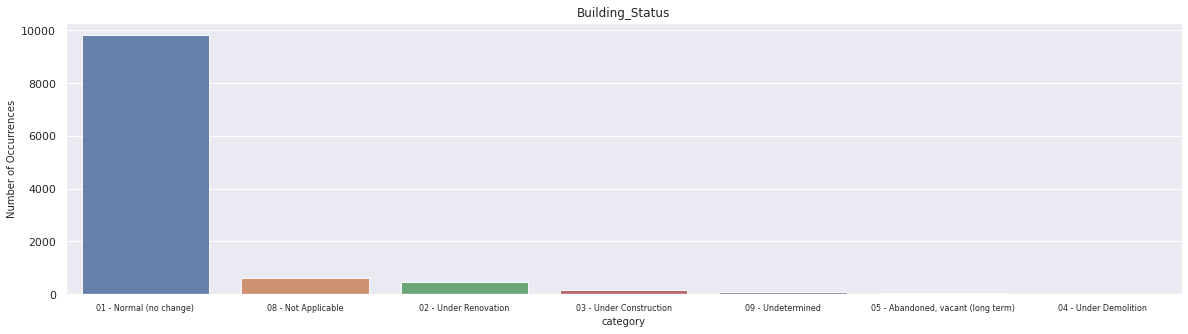

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


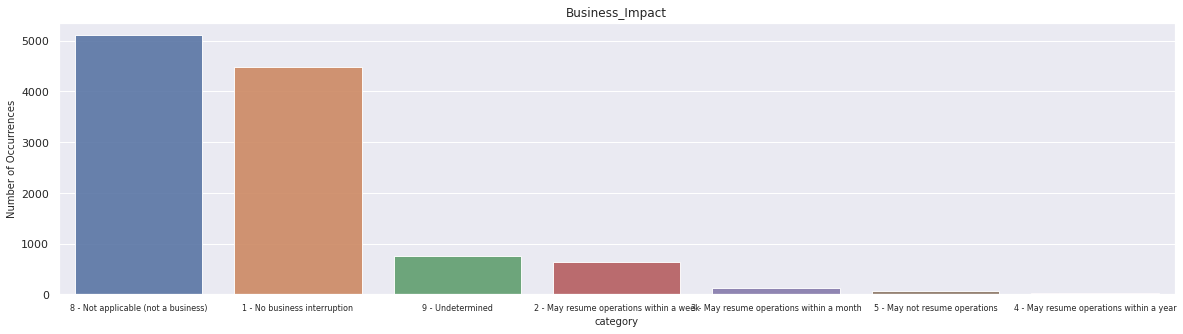

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


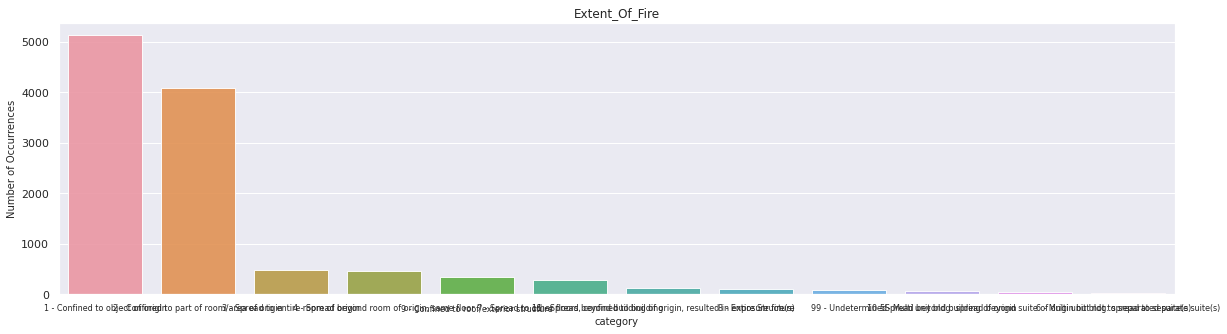

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


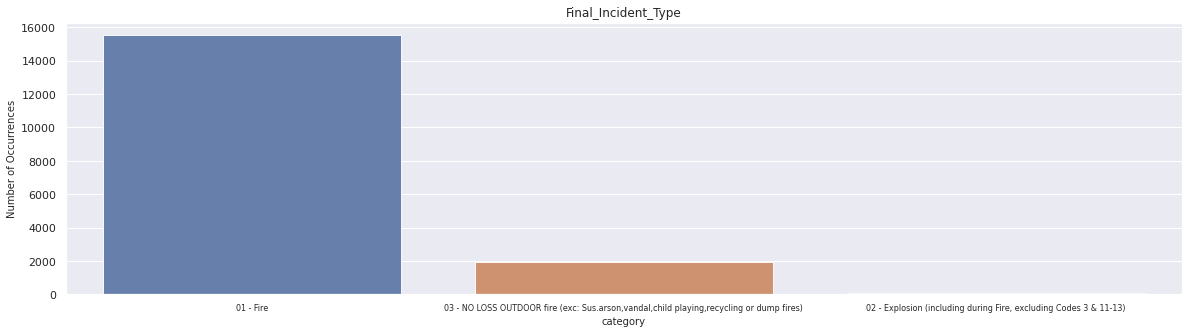

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


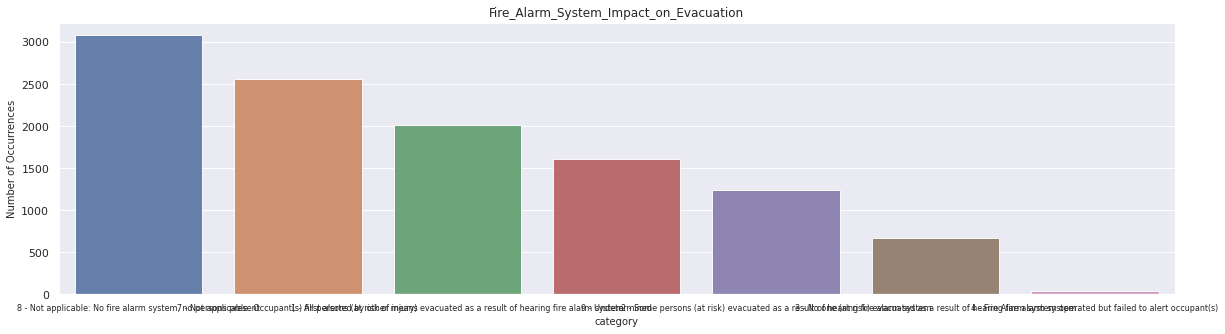

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


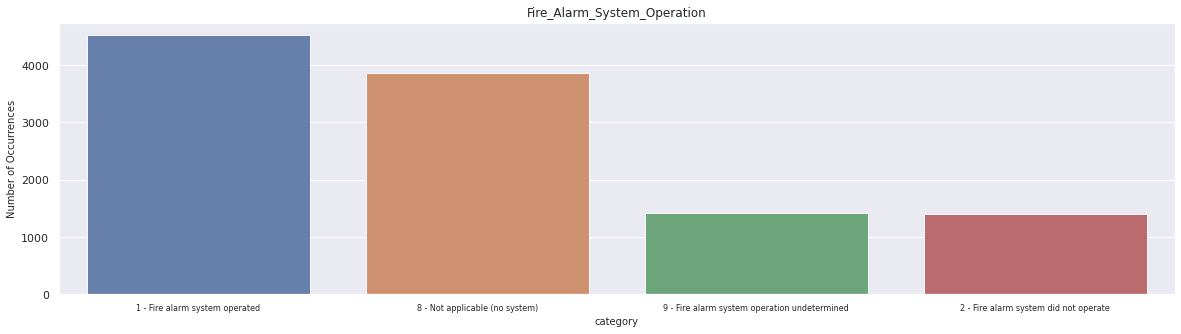

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


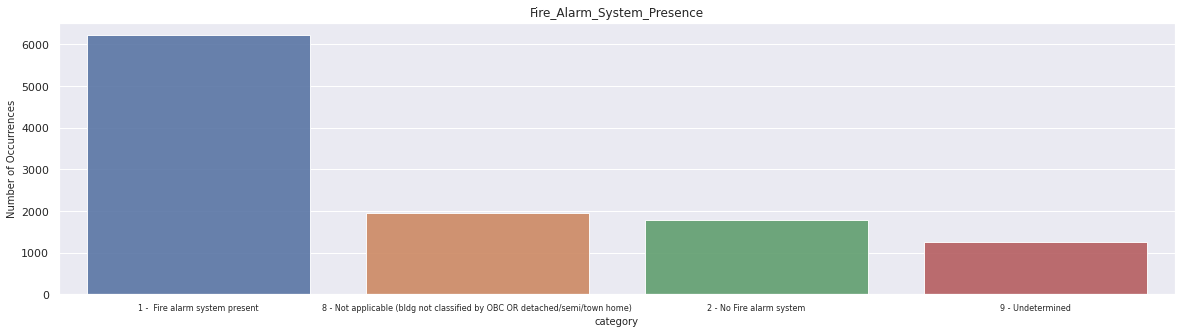

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


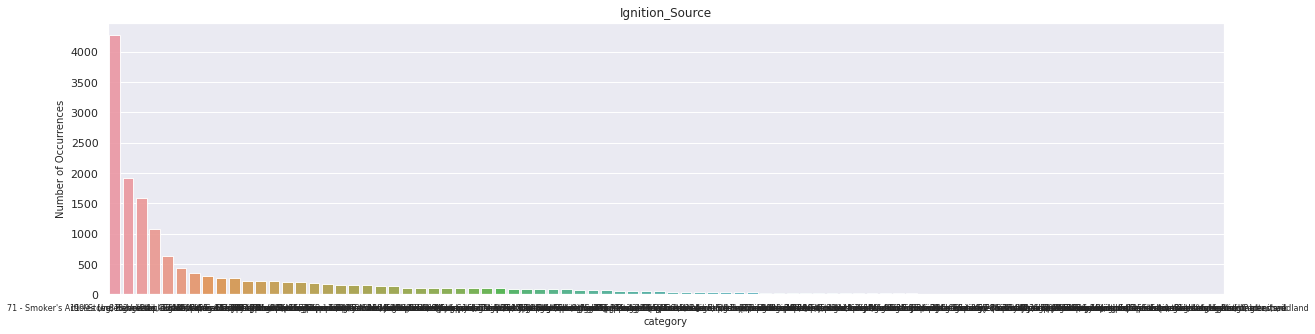

In [84]:
for c in variables_jimena_cat[:8]:
  viz_counts(c)